# The Olympic games


I download Olympic Sports and Medals, which can be found on the Kaggle website. I used only summer.csv dataset,
which contains the most important informations about summer Olympic Games. In this raport I would like to present some basic informations about the medalists over the years. 

In [2]:
### read libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### read the data
df = pd.read_csv('summer.csv')
print('Shape of the data:',df.shape)

Shape of the data: (31165, 9)


Let's chceck how this data looks like. There are 31165 rows and 9 columns. Collection of data includes results since 1896.
Let's describe a little each of the columns.

<br>**Year** : The year the Olympic Games were held
<br>**City** : Host city
<br>**Sport** : Kind of sport
<br>**Discipline** : Specific discipline
<br>**Athlete** : Name of medalist
<br>**Country** : Nationality
<br>**Gender** : Gender
<br>**Event** : Specific competition
<br>**Medal** : Type of medal

In [4]:
### present the data
df.head(10)

Year    City     Sport Discipline                Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming          HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming       HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming      DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming     MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming     CHASAPIS, Spiridon     GRE    Men   
5  1896  Athens  Aquatics   Swimming  CHOROPHAS, Efstathios     GRE    Men   
6  1896  Athens  Aquatics   Swimming          HAJOS, Alfred     HUN    Men   
7  1896  Athens  Aquatics   Swimming       ANDREOU, Joannis     GRE    Men   
8  1896  Athens  Aquatics   Swimming  CHOROPHAS, Efstathios     GRE    Men   
9  1896  Athens  Aquatics   Swimming          NEUMANN, Paul     AUT    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver  
5             1200M Freestyle  Bronze  
6             1200M Freestyle    Gold  
7             1200M Freestyle  Silver  
8              400M Freestyle  Bronze  
9              400M Freestyle    Gold

In [5]:
df.describe(include='all')

Year    City     Sport Discipline          Athlete Country  \
count   31165.000000   31165     31165      31165            31165   31161   
unique           NaN      22        43         67            22762     147   
top              NaN  London  Aquatics  Athletics  PHELPS, Michael     USA   
freq             NaN    3567      4170       3638               22    4585   
mean     1970.482785     NaN       NaN        NaN              NaN     NaN   
std        33.158416     NaN       NaN        NaN              NaN     NaN   
min      1896.000000     NaN       NaN        NaN              NaN     NaN   
25%      1948.000000     NaN       NaN        NaN              NaN     NaN   
50%      1980.000000     NaN       NaN        NaN              NaN     NaN   
75%      2000.000000     NaN       NaN        NaN              NaN     NaN   
max      2012.000000     NaN       NaN        NaN              NaN     NaN   

       Gender     Event  Medal  
count   31165     31165  31165  
unique      2       666      3  
top       Men  Football   Gold  
freq    22746      1497  10486  
mean      NaN       NaN    NaN  
std       NaN       NaN    NaN  
min       NaN       NaN    NaN  
25%       NaN       NaN    NaN  
50%       NaN       NaN    NaN  
75%       NaN       NaN    NaN  
max       NaN       NaN    NaN

Above we have summary of the data. For example mean of the Year column is 1970.48. Considering that the data have informations
since 1896 to 2012 we can say that in the later years we have more medalists. That means that we have more disciplines in the later years.

## Clear data

In [6]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

We can see that in 4 rows we have empty cells in Country column. Let's see these rows.

In [7]:
df[df['Country'].isnull()]

Year    City          Sport           Discipline          Athlete  \
29603  2012  London      Athletics            Athletics          Pending   
31072  2012  London  Weightlifting        Weightlifting          Pending   
31091  2012  London  Weightlifting        Weightlifting          Pending   
31110  2012  London      Wrestling  Wrestling Freestyle  KUDUKHOV, Besik   

      Country Gender     Event   Medal  
29603     NaN  Women     1500M    Gold  
31072     NaN  Women      63KG    Gold  
31091     NaN    Men      94KG  Silver  
31110     NaN    Men  Wf 60 KG  Silver

In [8]:
### Complete the data based on official results
df.at[29603,'Country'] = 'BHR'
df.at[29603,'Athlete'] = 'Maryam Yusuf JAMAL'
df.at[31072,'Country'] = 'CAN'
df.at[31072,'Athlete'] = 'Christine GIRARD'
df.at[31091,'Country'] = 'IRN'
df.at[31091,'Athlete'] = 'Saeid MOHAMMADPOUR'
df.at[31110,'Country'] = 'RUS'

In [9]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

We can see that clearing the data was done correctly.

## Basic analysis

Below I am presenting informations about the most title athletes.

In [10]:
### The most titled athlete

print('Man with the biggest number of Olympic Medals:',df[df['Gender']=='Men']['Athlete'].value_counts().index[0])
print('Number of medals:', df[df['Gender']=='Men']['Athlete'].value_counts().values[0])
print('Gold medals:',df[(df['Athlete'] == 'PHELPS, Michael') & (df['Medal'] == 'Gold')]['Athlete'].value_counts().values[0])
print('Silver medals:',df[(df['Athlete'] == 'PHELPS, Michael') & (df['Medal'] == 'Silver')]['Athlete'].value_counts().values[0])
print('Bronze medals:',df[(df['Athlete'] == 'PHELPS, Michael') & (df['Medal'] == 'Bronze')]['Athlete'].value_counts().values[0])

Man with the biggest number of Olympic Medals: PHELPS, Michael
Number of medals: 22
Gold medals: 18
Silver medals: 2
Bronze medals: 2


In [11]:
### The most titled sportswoman

print('Woman with the biggest number of Olympic Medals:',df[df['Gender']=='Women']['Athlete'].value_counts().index[0])
print('Number of medals:', df[df['Gender']=='Women']['Athlete'].value_counts().values[0])
print('Gold medals:',df[(df['Athlete'] == 'LATYNINA, Larisa') & (df['Medal'] == 'Gold')]['Athlete'].value_counts().values[0])
print('Silver medals:',df[(df['Athlete'] == 'LATYNINA, Larisa') & (df['Medal'] == 'Silver')]['Athlete'].value_counts().values[0])
print('Bronze medals:',df[(df['Athlete'] == 'LATYNINA, Larisa') & (df['Medal'] == 'Bronze')]['Athlete'].value_counts().values[0])

Woman with the biggest number of Olympic Medals: LATYNINA, Larisa
Number of medals: 18
Gold medals: 9
Silver medals: 5
Bronze medals: 4


Below I am presenting informations about athletes who have won the biggest number of medals of specified colour.

In [12]:
### Biggest value of medal colour men

print('MEN:')
print('Gold medal:', df[(df['Gender'] == 'Men') & (df['Medal'] == 'Gold')]['Athlete'].value_counts().index[0],', Number of medals: ', df[(df['Gender'] == 'Men') & (df['Medal'] == 'Gold')]['Athlete'].value_counts().values[0])
print('Silver medal:', df[(df['Gender'] == 'Men') & (df['Medal'] == 'Silver')]['Athlete'].value_counts().index[0:2],', Number of medals: ', df[(df['Gender'] == 'Men') & (df['Medal'] == 'Silver')]['Athlete'].value_counts().values[0])
print('Bronze medal:', df[(df['Gender'] == 'Men') & (df['Medal'] == 'Bronze')]['Athlete'].value_counts().index[0:2],', Number of medals: ', df[(df['Gender'] == 'Men') & (df['Medal'] == 'Bronze')]['Athlete'].value_counts().values[0])

MEN:
Gold medal: PHELPS, Michael , Number of medals:  18
Silver medal: Index(['DITYATIN, Aleksandr', 'VORONIN, Mikhail'], dtype='object') , Number of medals:  6
Bronze medal: Index(['NEMOV, Alexei', 'SAVOLAINEN, Heikki'], dtype='object') , Number of medals:  6


In [13]:
### Biggest value of medal colour women

print('WOMEN:')
print('Gold medal:', df[(df['Gender'] == 'Women') & (df['Medal'] == 'Gold')]['Athlete'].value_counts().index[0],', Number of medals: ', df[(df['Gender'] == 'Women') & (df['Medal'] == 'Gold')]['Athlete'].value_counts().values[0])
print('Silver medal:', df[(df['Gender'] == 'Women') & (df['Medal'] == 'Silver')]['Athlete'].value_counts().index[0],', Number of medals: ', df[(df['Gender'] == 'Women') & (df['Medal'] == 'Silver')]['Athlete'].value_counts().values[0])
print('Bronze medal:', df[(df['Gender'] == 'Women') & (df['Medal'] == 'Bronze')]['Athlete'].value_counts().index[0:2],', Number of medals: ', df[(df['Gender'] == 'Women') & (df['Medal'] == 'Bronze')]['Athlete'].value_counts().values[0])

WOMEN:
Gold medal: LATYNINA, Larisa , Number of medals:  9
Silver medal: BABASHOFF, Shirley Farber , Number of medals:  6
Bronze medal: Index(['OTTEY-PAGE, Merlene', 'VAN ALMSICK, Franziska'], dtype='object') , Number of medals:  6


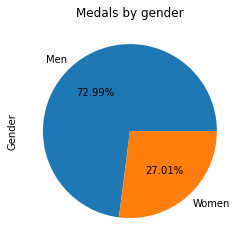

In [14]:
### Proportion in medals by gender
df.Gender.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Medals by gender')
plt.show()

As we can see above, it is a big disproportion between men and women in conquering the medals. That is because firstly the competition played only for men. Over the years they were created another competition for women.

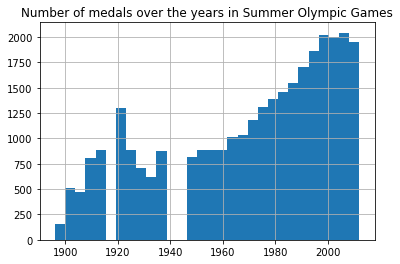

In [15]:
##### Number of medals over the years
plt.title('Number of medals over the years in Summer Olympic Games')
df['Year'].hist(bins = 30)
plt.show()

We can see on the histogram that number of medalists has an increasing tendency. That is because there are more and more disciplines during The Olympic Games. We can also see that in years 1916, 1940 and 1944 The Olympic Games did not take place. It was obviously because Word War I and Word War II.


Below we can see how number of medals looks like in each Olympic Games.

In [16]:
### Number of medal type over the years

pd.pivot_table(df, values='Athlete', index = 'Year', columns = 'Medal',aggfunc='count')

Medal  Bronze  Gold  Silver
Year                       
1896       40    64      47
1900      142   178     192
1904      123   188     159
1908      211   311     282
1912      284   301     300
1920      355   497     446
1924      285   301     298
1928      242   229     239
1932      196   213     206
1936      282   299     294
1948      268   276     270
1952      299   300     290
1956      297   298     290
1960      301   295     286
1964      343   330     337
1968      351   341     339
1972      412   387     386
1976      447   429     429
1980      472   460     455
1984      500   483     476
1988      535   506     505
1992      596   558     551
1996      634   615     610
2000      685   663     667
2004      679   659     660
2008      710   669     663
2012      680   636     633

Now we can see how look like winning the medals by the most titled countires looks like over the years.

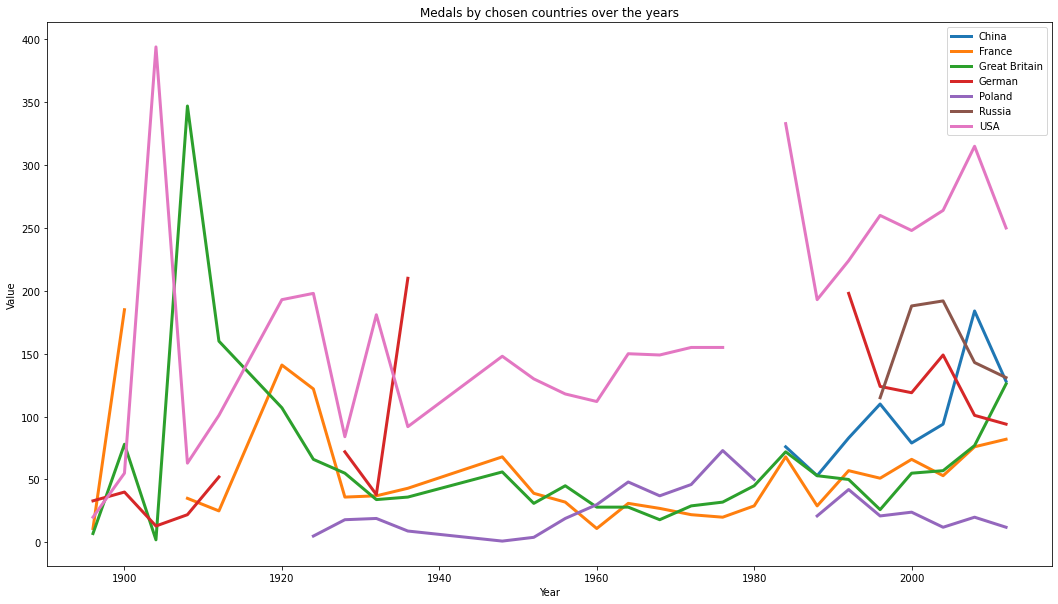

In [17]:
### Plot medals by chosen country over the years
table = df.groupby(['Year','Country'])['Medal'].count().reset_index()
#table=table[table['Country'].isin(df['Country'].value_counts()[:5].index)]
table = table[(table['Country'] == 'USA') | (table['Country']== 'POL') | (table['Country']== 'GER') | (table['Country']== 'RUS') | (table['Country']== 'GBR') | (table['Country']== 'FRA') | (table['Country']== 'CHN') ]
table = table.pivot('Year','Country','Medal')
table.plot(linewidth = 3)
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.title('Medals by chosen countries over the years')
plt.legend(labels = ['China','France','Great Britain', 'German','Poland','Russia','USA'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

We can see that some lines are intermittent. That means this country don't participate in specific competition.
For example for German we have big intermittent, because country name was German Democratic Republic.


Below we can see top 15 countries in winning medals and division by colour of medals. 'URS' and 'GDR' are shorts from not existing anymore Soviet Union and German Democratic Republic.

In [18]:
df['Country'].value_counts().head(15)

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     769
CAN     650
Name: Country, dtype: int64

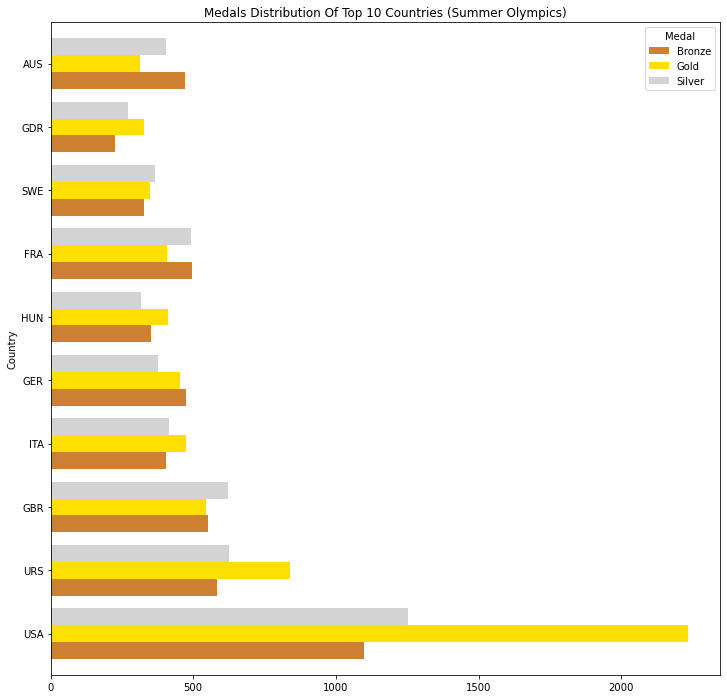

In [19]:
### Type of medals for each country from top 10 winners
medals_country=df.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender')
top=medals_country.sort_values(by='Gold',ascending=False)[:10]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

Below we have information how top 10 countries winning medals in particular disciplines.

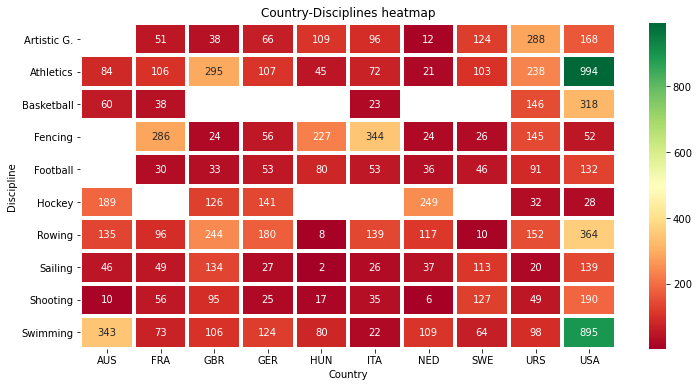

In [20]:
### Heatmap Country - Disciplines
test2=df[df['Country'].isin(df['Country'].value_counts()[:10].index)]
test2=test2[test2['Discipline'].isin(df['Discipline'].value_counts()[:10].index)]
test2=test2.groupby(['Country','Discipline'])['Sport'].count().reset_index()
test2=test2.pivot('Discipline','Country','Sport')
sns.heatmap(test2,cmap='RdYlGn',annot=True,fmt='1.0f',lw = 3)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.title('Country-Disciplines heatmap')
plt.show()

## Summary

First of all I presented how the data looks like. Then I cleared the data. I had to replaced 'Pending' and 'NaN' cells based on official results.

In the data we can observe: 
- the most titled athletes in The Olympic Games are swimmer Michael Phelps and gymnast Larisa Latynina,
- it is a big disproportion between winning medals by men and women. Men scored over 70% medals,
- over the years there ara more and more new disciplines and new  gained medals,
- the most titled country is The United States,
- the most medals were won devided by disciplines by The United States in Athletics.

